## Customer Segmentation--------------------------------------------------------by Sadvi Sandhya

In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('seaborn')
import pandas_profiling as pp

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Read Data and Explore Data

Online Retail Data Set
Data Set Description

Abstract: This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

Data Set Characteristics:  

Multivariate, Sequential, Time-Series

Number of Instances:

541909

Area:

Business

Attribute Characteristics:

Integer, Real

Number of Attributes:

8

Source:

Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.


Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
UnitPrice: Unit price. Numeric, Product price per unit in sterling.
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
Country: Country name. Nominal, the name of the country where each customer resides.

In [6]:
data_df = pd.read_csv('data.csv', encoding='unicode_escape')

In [7]:
print('Few records of the dataset:\n', data_df.head())
print ('=' * 100)
print('Attributes of the dataset:\n', data_df.columns)
print ('=' * 100,)
print('Size of the dataset:\n', data_df.shape)
print ('=' * 100)
print('Description of the dataset:\n', data_df.describe())
print ('=' * 100)
print('Datatypes of the dataset:\n', data_df.dtypes)

Few records of the dataset:
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
Attributes of the dataset:
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
Size of the d

In [8]:
# Numerical/continuous -- CusId, UP, Qty
# categorical InNum,STCode,country

In [9]:
data_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# 135080 Customer ids are missing  Dropping these rows with null customer id as we can not fill the customer ids using either mean,median or any other value
data_df.dropna(inplace= True)

In [11]:
data_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
data_df.shape

(406829, 8)

In [13]:

data_df[(data_df.Quantity)<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


#### we see some negative values in the quantity and unitprice column
#### we can also see other than numbers stockcode has some alphabatic code like 'D'/ 'M'
#### Invoice number starts with C for those columns where quantities are negative C probably shows cancelled orders

In [14]:
#sns.pairplot(data_df)

In [15]:
total_country= data_df['Country'].value_counts()
len(total_country)

37

In [16]:
data_df['StockCode'].value_counts()

85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
          ... 
21412        1
37491C       1
37503        1
90199B       1
90027A       1
Name: StockCode, Length: 3684, dtype: int64

In [17]:
data_df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
12943.0       1
13135.0       1
18068.0       1
17347.0       1
16093.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [18]:
data_df_1 = data_df[['CustomerID', 'InvoiceNo','Country']].groupby(['CustomerID', 'InvoiceNo','Country'])


In [19]:
pd.DataFrame([{'Countries': len(data_df['Country'].value_counts()), 'Products':len(data_df['StockCode'].value_counts()),
                'Total Transactions': len(data_df['InvoiceNo'].value_counts()),'Total Customers': len(data_df['CustomerID'].value_counts())
              
              }], columns = ['Countries','Products','Total Transactions','Total Customers'], index = ['Quantity']
            
            ) 

,Countries,Products,Total Transactions,Total Customers
Quantity,37,3684,22190,4372


#### there are 3684 unique products, purchases from 37 countries

#### there are 4372 customer_id or unique customers

In [20]:
##pp.ProfileReport(data_df)

In [21]:
# to calculate the Total amount paid per invoice number
data_df['Amount'] = data_df['UnitPrice'] * data_df['Quantity']

In [22]:
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [23]:
# sns.set(rc={'figure.figsize':(10,8)})
# ax = sns.barplot(x='Amount',y='Country', data= data_df)
# ax.set(xlabel='Amount', ylabel='Country')
# ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)


In [24]:
data_df_2 = data_df.groupby(['CustomerID','InvoiceNo' ],as_index=False)['InvoiceDate'].count()

In [25]:
data_df_2 .head()

,CustomerID,InvoiceNo,InvoiceDate
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24


In [26]:
# counting the  invoice date per invoice number will give total number of products purchased per invoice number
data_df_3= data_df_2.rename(columns = {'InvoiceDate':'Numproductsperbasket'})
data_df_3

,CustomerID,InvoiceNo,Numproductsperbasket
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
...,...,...,...
22185,18283.0,579673,52
22186,18283.0,580872,50
22187,18287.0,554065,29
22188,18287.0,570715,38


In [27]:
# -ve values indicate the orders cancelled ,cancelled orders invoice number satrts with C
# to check the orders cancelled
data_df_3['CancelledOrders'] = data_df_3['InvoiceNo'].apply(lambda x : int ('C' in x))
data_df_3.head()

,CustomerID,InvoiceNo,Numproductsperbasket,CancelledOrders
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0


In [28]:
data_df_3[data_df_3['CancelledOrders']==1]

,CustomerID,InvoiceNo,Numproductsperbasket,CancelledOrders
1,12346.0,C541433,1,1
23,12352.0,C545329,2,1
24,12352.0,C545330,1,1
25,12352.0,C547388,7,1
39,12359.0,C549955,2,1
...,...,...,...,...
22159,18274.0,C577832,11,1
22161,18276.0,C577386,1,1
22162,18276.0,C577390,1,1
22164,18277.0,C542086,1,1


In [29]:
# to find the % of cancelled orders
co1=data_df_3['CancelledOrders'].sum()
co2=data_df_3.shape[0]
percentage= co1/co2 * 100
print('Percentatge of Cancelled orders :', np.round(percentage, decimals=2),'%')

Percentatge of Cancelled orders : 16.47 %


In [30]:
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [31]:
temp=data_df[data_df['CustomerID']==12346.0]
temp

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,-77183.6


In [32]:
data_df[data_df['CustomerID'] == 18274.0] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
453557,575485,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,4,11/9/2011 17:03,3.75,18274.0,United Kingdom,15.00
453558,575485,22851,SET 20 NAPKINS FAIRY CAKES DESIGN,12,11/9/2011 17:03,0.85,18274.0,United Kingdom,10.20
453559,575485,22989,SET 2 PANTRY DESIGN TEA TOWELS,6,11/9/2011 17:03,3.25,18274.0,United Kingdom,19.50
453560,575485,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,4,11/9/2011 17:03,4.95,18274.0,United Kingdom,19.80
453561,575485,23245,SET OF 3 REGENCY CAKE TINS,4,11/9/2011 17:03,4.95,18274.0,United Kingdom,19.80
453562,575485,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3,11/9/2011 17:03,4.95,18274.0,United Kingdom,14.85
453563,575485,21231,SWEETHEART CERAMIC TRINKET BOX,12,11/9/2011 17:03,1.25,18274.0,United Kingdom,15.00
453564,575485,21974,SET OF 36 PAISLEY FLOWER DOILIES,12,11/9/2011 17:03,1.45,18274.0,United Kingdom,17.40
453565,575485,84988,SET OF 72 PINK HEART PAPER DOILIES,12,11/9/2011 17:03,1.45,18274.0,United Kingdom,17.40
453566,575485,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,18,11/9/2011 17:03,0.79,18274.0,United Kingdom,14.22


In [33]:
#### there is a counter data for cancelled transactions


In [34]:
data_df[data_df['Description'] == 'Discount'] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
9038,C537164,D,Discount,-1,12/5/2010 13:21,29.29,14527.0,United Kingdom,-29.29
14498,C537597,D,Discount,-1,12/7/2010 12:34,281.00,15498.0,United Kingdom,-281.00
19392,C537857,D,Discount,-1,12/8/2010 16:00,267.12,17340.0,United Kingdom,-267.12
31134,C538897,D,Discount,-1,12/15/2010 9:14,5.76,16422.0,United Kingdom,-5.76
...,...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,11/18/2011 12:06,19.82,14527.0,United Kingdom,-19.82
479869,C577227,D,Discount,-1,11/18/2011 12:06,16.76,14527.0,United Kingdom,-16.76
493613,C578239,D,Discount,-1,11/23/2011 12:29,26.33,14912.0,Italy,-26.33
516221,C579884,D,Discount,-1,11/30/2011 17:34,20.53,14527.0,United Kingdom,-20.53


In [35]:
df_cleaned = data_df.copy(deep = True)
df_cleaned['QuantityCancelled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  data_df.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = data_df[(data_df['CustomerID'] == col['CustomerID']) &
                         (data_df['StockCode']  == col['StockCode']) & 
                         (data_df['InvoiceDate'] < col['InvoiceDate']) & 
                         (data_df['Quantity']   > 0)].copy()
    #_________________________________
    # Cancellation WITHOUT counter data
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    #________________________________
    # Cancellation WITH a counter data
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCancelled'] = -col['Quantity']
        entry_to_remove.append(index)        
    #______________________________________________________________
    # Various counter data exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCancelled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break    

In [36]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 6168
doubtfull_entry: 2616


In [37]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("number of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

number of entries to delete: 44


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,QuantityCancelled
27329,C538530,22630,DOLLY GIRL LUNCH BOX,-33,12/13/2010 10:26,1.95,14796.0,United Kingdom,-64.35,0
32870,C539195,22942,CHRISTMAS LIGHTS 10 SANTAS,-5,12/16/2010 12:05,8.50,12748.0,United Kingdom,-42.50,0
33085,C539221,22941,CHRISTMAS LIGHTS 10 REINDEER,-12,12/16/2010 12:56,8.50,14911.0,EIRE,-102.00,0
33086,C539221,22942,CHRISTMAS LIGHTS 10 SANTAS,-10,12/16/2010 12:56,8.50,14911.0,EIRE,-85.00,0
58496,C541245,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,-12,1/16/2011 12:40,4.25,15535.0,United Kingdom,-51.00,0


In [38]:
df_cleaned.drop(remaining_entries.index, axis = 0, inplace = True)

In [39]:
df_cleaned.shape

(398001, 10)

In [40]:
df_cleaned['TotalAmount'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCancelled'])


In [41]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Amount', 'QuantityCancelled',
       'TotalAmount'],
      dtype='object')

### RFM Analysis
RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

Recency – How recently did the customer purchase?

Frequency – How often do they purchase?

Monetary Value – How much do they spend?

#### Monetary - Total or average amount spent by the customer.

In [42]:
df_cust = df_cleaned.groupby('CustomerID')[['TotalAmount']].sum()
df_cust.rename(columns=({'TotalAmount':'Monetary'}), inplace=True)

In [43]:
df_cust.reset_index()


,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,176.60
4337,18283.0,2094.88


#### Frequency - Total number of transactions made by customer

In [44]:
df_cust['Frequency'] = df_cleaned.groupby('CustomerID')['InvoiceNo'].count()

#### Recency - Time since last order or engaged with product.

In [45]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'],infer_datetime_format=True)

In [46]:
max_date = max(df_cleaned['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [47]:
df_cleaned['DateDifference'] = max_date - df_cleaned['InvoiceDate']
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,QuantityCancelled,TotalAmount,DateDifference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,20.34,373 days 04:24:00


In [48]:
df_cust['Recency'] = df_cleaned.groupby('CustomerID')['DateDifference'].min().dt.days
df_cust = df_cust.reset_index()
df_cust.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


            CustomerID  Monetary  Frequency   Recency
CustomerID    1.000000 -0.012828  -0.001325  0.007844
Monetary     -0.012828  1.000000   0.446645 -0.130615
Frequency    -0.001325  0.446645   1.000000 -0.206050
Recency       0.007844 -0.130615  -0.206050  1.000000


<AxesSubplot:>

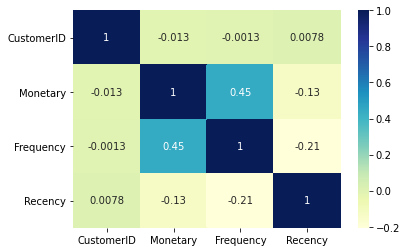

In [49]:
#Lets check the correlation between the the Recency, Frequency and Monetary part of the RFM table which will be an integral part of customer segmentation
print(df_cust.corr())
sns.heatmap(df_cust.corr(),cmap="YlGnBu",annot=True)

In [50]:
df_cleaned[df_cleaned['CustomerID'] == 12350.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,QuantityCancelled,TotalAmount,DateDifference
80323,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02 16:01:00,2.10,12350.0,Norway,25.2,0,25.2,309 days 20:49:00
80324,543037,22412,METAL SIGN NEIGHBOURHOOD WITCH,12,2011-02-02 16:01:00,2.10,12350.0,Norway,25.2,0,25.2,309 days 20:49:00
80325,543037,79066K,RETRO MOD TRAY,10,2011-02-02 16:01:00,0.85,12350.0,Norway,8.5,0,8.5,309 days 20:49:00
80326,543037,79191C,RETRO PLASTIC ELEPHANT TRAY,12,2011-02-02 16:01:00,0.85,12350.0,Norway,10.2,0,10.2,309 days 20:49:00
80327,543037,22348,TEA BAG PLATE RED RETROSPOT,24,2011-02-02 16:01:00,0.85,12350.0,Norway,20.4,0,20.4,309 days 20:49:00
80328,543037,84086C,PINK/PURPLE RETRO RADIO,6,2011-02-02 16:01:00,2.95,12350.0,Norway,17.7,0,17.7,309 days 20:49:00
80329,543037,22551,PLASTERS IN TIN SPACEBOY,12,2011-02-02 16:01:00,1.65,12350.0,Norway,19.8,0,19.8,309 days 20:49:00
80330,543037,22557,PLASTERS IN TIN VINTAGE PAISLEY,12,2011-02-02 16:01:00,1.65,12350.0,Norway,19.8,0,19.8,309 days 20:49:00
80331,543037,21832,CHOCOLATE CALCULATOR,12,2011-02-02 16:01:00,1.65,12350.0,Norway,19.8,0,19.8,309 days 20:49:00
80332,543037,21915,RED HARMONICA IN BOX,12,2011-02-02 16:01:00,1.25,12350.0,Norway,15.0,0,15.0,309 days 20:49:00


In [51]:
df_cust.shape

(4339, 4)

(array([1880.,  848.,  457.,  328.,  200.,  126.,  112.,   64.,   59.,
         265.]),
 array([  1.  ,  32.31,  63.62,  94.93, 126.24, 157.55, 188.86, 220.17,
        251.48, 282.79, 314.1 ]),
 <BarContainer object of 10 artists>)

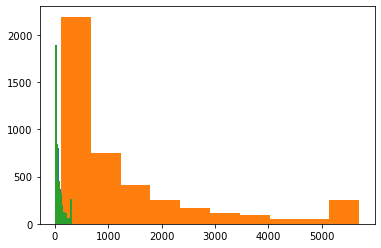

In [91]:
plt.hist(df_cust['Recency'])
plt.hist(df_cust['Monetary'])
plt.hist(df_cust['Frequency'])

(array([2191.,  749.,  413.,  255.,  167.,  115.,   92.,   56.,   47.,
         254.]),
 array([ 110.795 ,  670.0184, 1229.2418, 1788.4652, 2347.6886, 2906.912 ,
        3466.1354, 4025.3588, 4584.5822, 5143.8056, 5703.029 ]),
 <BarContainer object of 10 artists>)

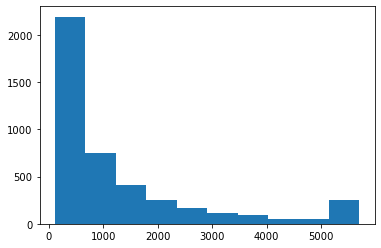

In [92]:
plt.hist(df_cust['Monetary'])

(array([1880.,  848.,  457.,  328.,  200.,  126.,  112.,   64.,   59.,
         265.]),
 array([  1.  ,  32.31,  63.62,  94.93, 126.24, 157.55, 188.86, 220.17,
        251.48, 282.79, 314.1 ]),
 <BarContainer object of 10 artists>)

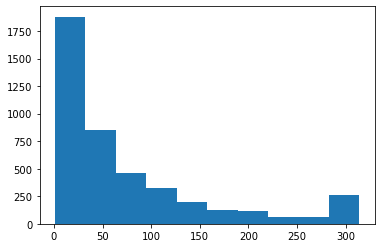

In [93]:
plt.hist(df_cust['Frequency'])

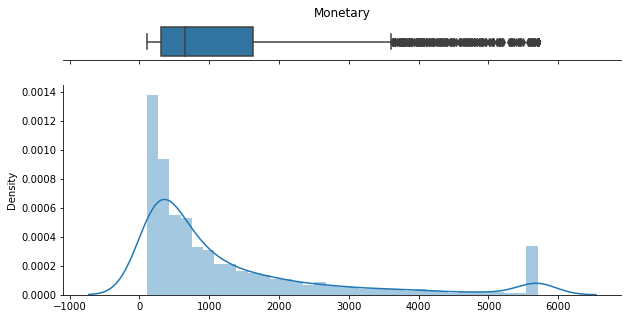

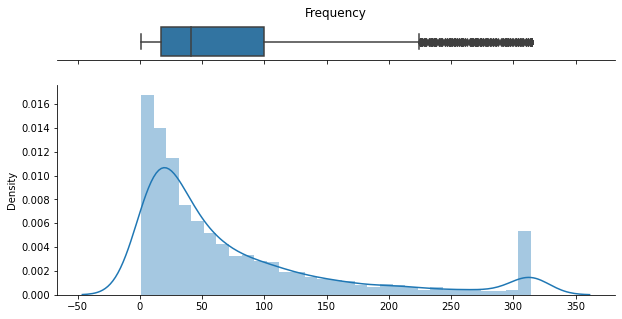

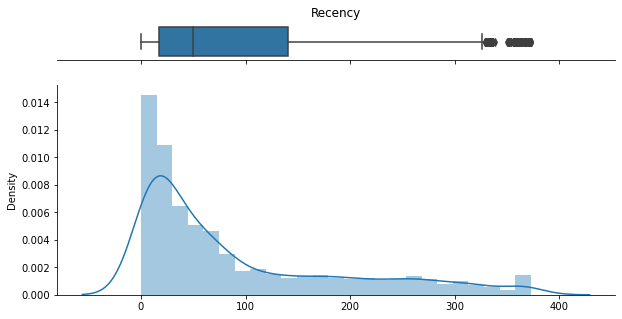

In [101]:
#checking outliers
import matplotlib.pyplot as plt

# for c in df_cust.columns:
#     fig, ax = plt.subplots(2,
#                            figsize=(8, 5),
#                            sharex=True,
#                            gridspec_kw={'height_ratios': (0.0, 0.85)})

#     ax_box = ax[0]
#     ax_box = sns.boxplot(df_cust[c],ax=ax_box)
#     ax_box.set(title=c, yticks=[], xlabel='')
#     sns.despine(ax=ax_box, left=True)
    
#     ax_hist = ax[1]
#     ax_hist = sns.distplot(df_cust[c], ax=ax_hist)
#     ax_hist.set(xlabel='')
#     sns.despine(ax=ax_hist)
    
    
# plt.show()


# for c in df.columns:
#     fig, ax = plt.subplots(2,
#                            figsize=(10, 5),
#                            sharex=True,
#                            gridspec_kw={'height_ratios': (0.15, 0.85)})

#     ax_box = ax[0]
#     ax_box = sns.boxplot(df[c], ax=ax_box)
#     ax_box.set(title=c, yticks=[], xlabel='')
#     sns.despine(ax=ax_box, left=True)

#     ax_hist = ax[1]
#     ax_hist = sns.distplot(df[c], ax=ax_hist)
#     ax_hist.set(xlabel='')
#     sns.despine(ax=ax_hist)

# plt.show()

for c in df_cust.columns[1:]:
    fig, ax = plt.subplots(2,
                           figsize=(10, 5),
                           sharex=True,
                           gridspec_kw={'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df_cust[c], ax=ax_box)
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)

    ax_hist = ax[1]
    ax_hist = sns.distplot(df_cust[c], ax=ax_hist)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show()

Based on the above box plots, it's visible that Monetary and Frequency attributes have outliers. Since clustering algorithms like K-means are susceptible to outliers we will be treating them by capping them at 95% quantile.

In [53]:
monetary_cap= df_cust['Monetary'].quantile(0.95)
df_cust['Monetary'][df_cust['Monetary'] > monetary_cap] = monetary_cap
monetary_cap_low = df_cust['Monetary'].quantile(0.05)
df_cust['Monetary'][df_cust['Monetary'] < monetary_cap_low]= monetary_cap_low


In [54]:
freq_cap= df_cust['Frequency'].quantile(0.95)
df_cust['Frequency'][df_cust['Frequency'] > freq_cap] = freq_cap


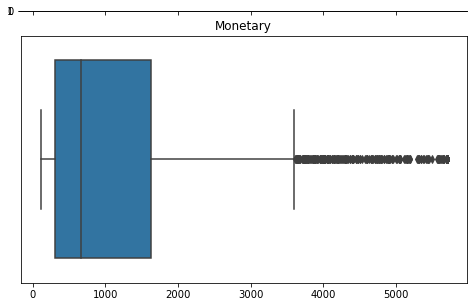

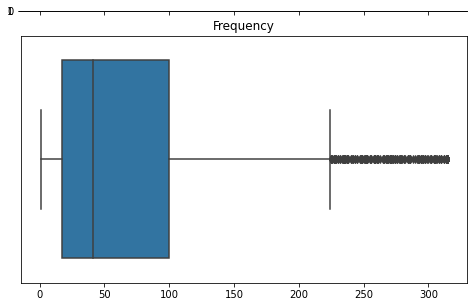

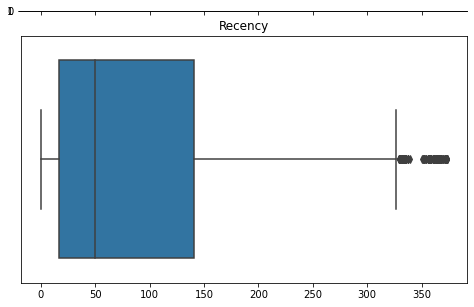

In [55]:
import warnings
warnings.filterwarnings('ignore')
for c in df_cust.columns[1:]:
    fig, ax = plt.subplots(2,
                           figsize=(8, 5),
                           sharex=True,
                           gridspec_kw={'height_ratios': (0.0, 0.85)})

   
    ax_box = sns.boxplot(df_cust[c])
    ax_box.set(title=c, yticks=[], xlabel='')
    
plt.show()

#### Data scaling

In [56]:
#scaling 
preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=2, random_state=1)),
        ]
    )

In [57]:
X = df_cust.drop('CustomerID',axis=1)
X_scaled = pd.DataFrame(preprocessor.fit_transform(X),columns=['PC_1','PC_2'])

In [58]:
X_scaled

,PC_1,PC_2
0,-0.570503,0.407893
1,0.664222,0.078549
2,-0.010208,-0.053637
3,0.139841,-0.147287
4,-0.493482,0.399646
...,...,...
4334,-0.484826,0.307235
4335,-0.377832,0.069736
4336,-0.145005,-0.331793
4337,0.682287,0.077400


## Clustering using K means

In [59]:
# optimization of K (1-10 clusters) using elbow method
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled )
    Sum_of_squared_distances.append(km.inertia_)

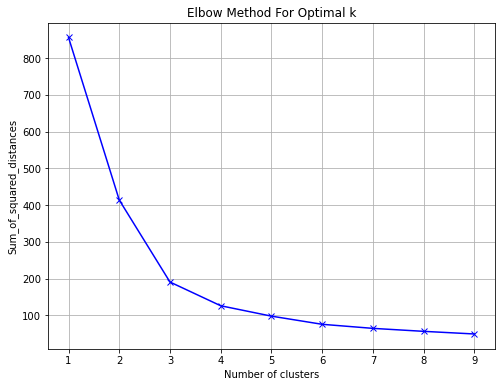

In [60]:
plt.figure(figsize=(8,6))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid(b=True)
plt.show()

From the above curve we can see that optimal value of  k is 3 or 4 that is the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. 
Adding another cluster/ more than 4 in this case doesn't give much better modeling of the data.



In [61]:
# Lets try Kmeans using clusters 3 or 4
no_clusters = 4
km1= KMeans(n_clusters=no_clusters, max_iter= 100 , random_state = 1 )
km1=km1.fit(X_scaled)

In [62]:
clusters= km1.labels_
clusters.shape

(4339,)

In [63]:
X_scaled['cluster_id'] = km1.labels_
X['cluster_id'] = km1.labels_

In [64]:
X.head()

,Monetary,Frequency,Recency,cluster_id
0,110.795,1.0,325,3
1,4310.000,182.0,1,1
2,1797.240,31.0,74,0
3,1757.550,73.0,18,2
4,334.400,17.0,309,3


In [65]:
X_scaled['cluster_id'].value_counts()

0    2028
3    1002
2     834
1     475
Name: cluster_id, dtype: int64

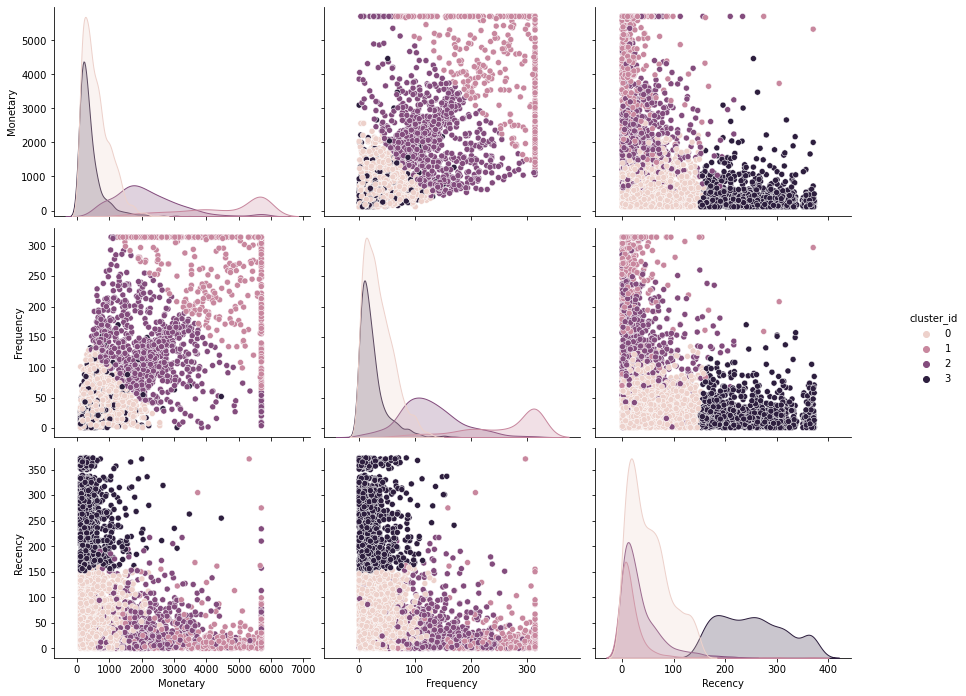

In [66]:
g= sns.pairplot(X, hue = 'cluster_id')
g.fig.set_figwidth(14)
g.fig.set_figheight(10)

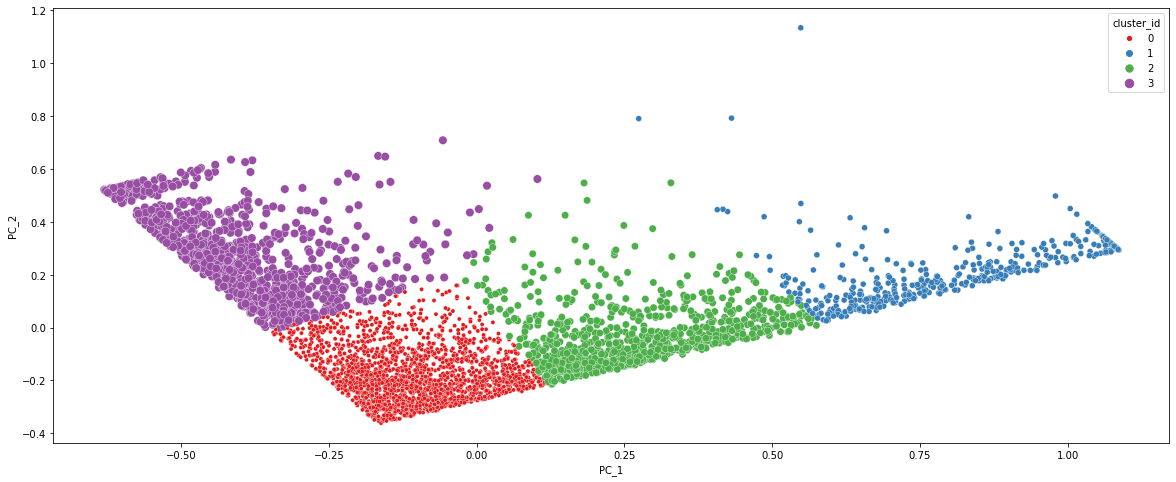

In [67]:
# Vusializing clusters using Principle Components
fig = plt.figure(figsize=[20,8])

sns.scatterplot(data=X_scaled,x="PC_1",y="PC_2",hue="cluster_id",size="cluster_id",palette="Set1")
plt.show()

In [68]:
# Lets try Kmeans using clusters 3 or 4
no_clusters = 3
km2= KMeans(n_clusters=no_clusters, max_iter= 100 , random_state = 1 )
km2=km2.fit(X_scaled)

In [69]:
X_scaled['cluster_id'] = km2.labels_
X['cluster_id'] = km2.labels_

In [70]:
# #plt.figure(figsize=(10, 20))
# plt.figure(figsize=(20,5))
# #plt.rcParams['figure.figsize']=20,10
# sns.pairplot(X, hue = 'cluster_id')


# # plt.figure(figsize=(16, 6))
# # sns.boxplot(x=data);


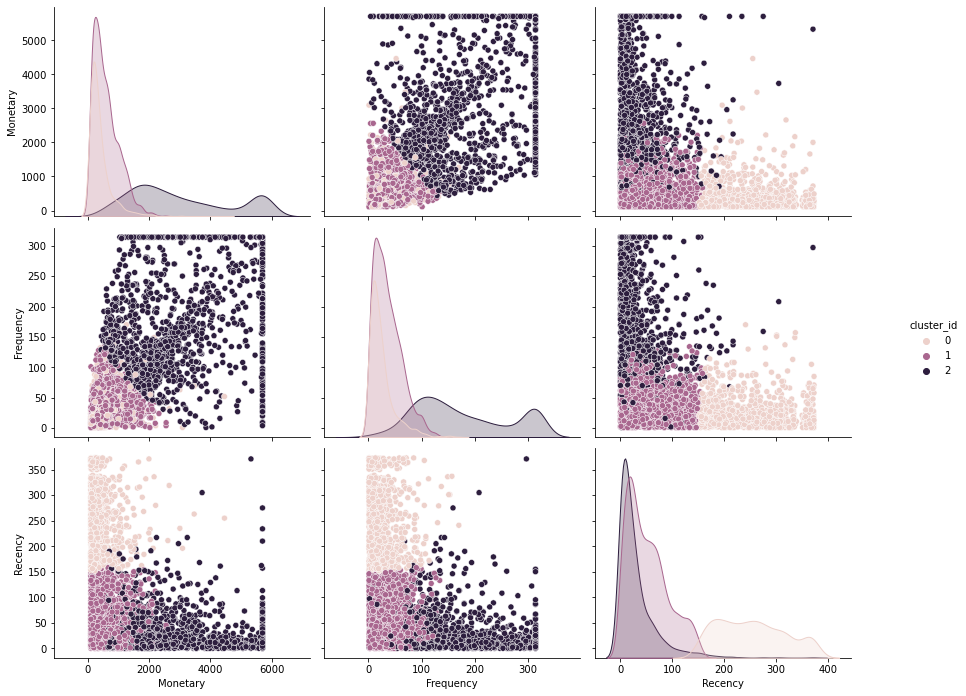

In [71]:
# fig = plt.gcf()
# fig.set_size_inches(12, 8)
# sns.pairplot(X, hue = 'cluster_id')

g= sns.pairplot(X, hue = 'cluster_id')
g.fig.set_figwidth(14)
g.fig.set_figheight(10)

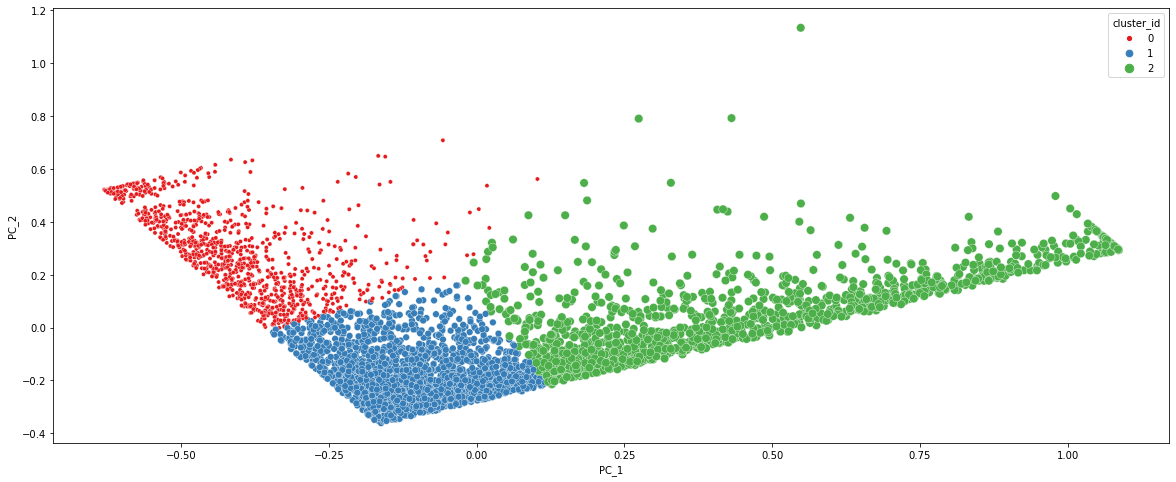

In [72]:
# Vusializing clusters using Principle Components
fig = plt.figure(figsize=[20,8])

sns.scatterplot(data=X_scaled,x="PC_1",y="PC_2",hue="cluster_id",size="cluster_id",palette="Set1")
plt.show()

In [73]:
X_scaled['cluster_id'].value_counts()

1    2028
2    1309
0    1002
Name: cluster_id, dtype: int64

In [74]:
cols = X.columns[0:-1]
cols

Index(['Monetary', 'Frequency', 'Recency'], dtype='object')

In [75]:
cols= X.columns[0:-1].tolist()
cols

['Monetary', 'Frequency', 'Recency']

In [76]:
X.head()

,Monetary,Frequency,Recency,cluster_id
0,110.795,1.0,325,0
1,4310.000,182.0,1,2
2,1797.240,31.0,74,1
3,1757.550,73.0,18,2
4,334.400,17.0,309,0


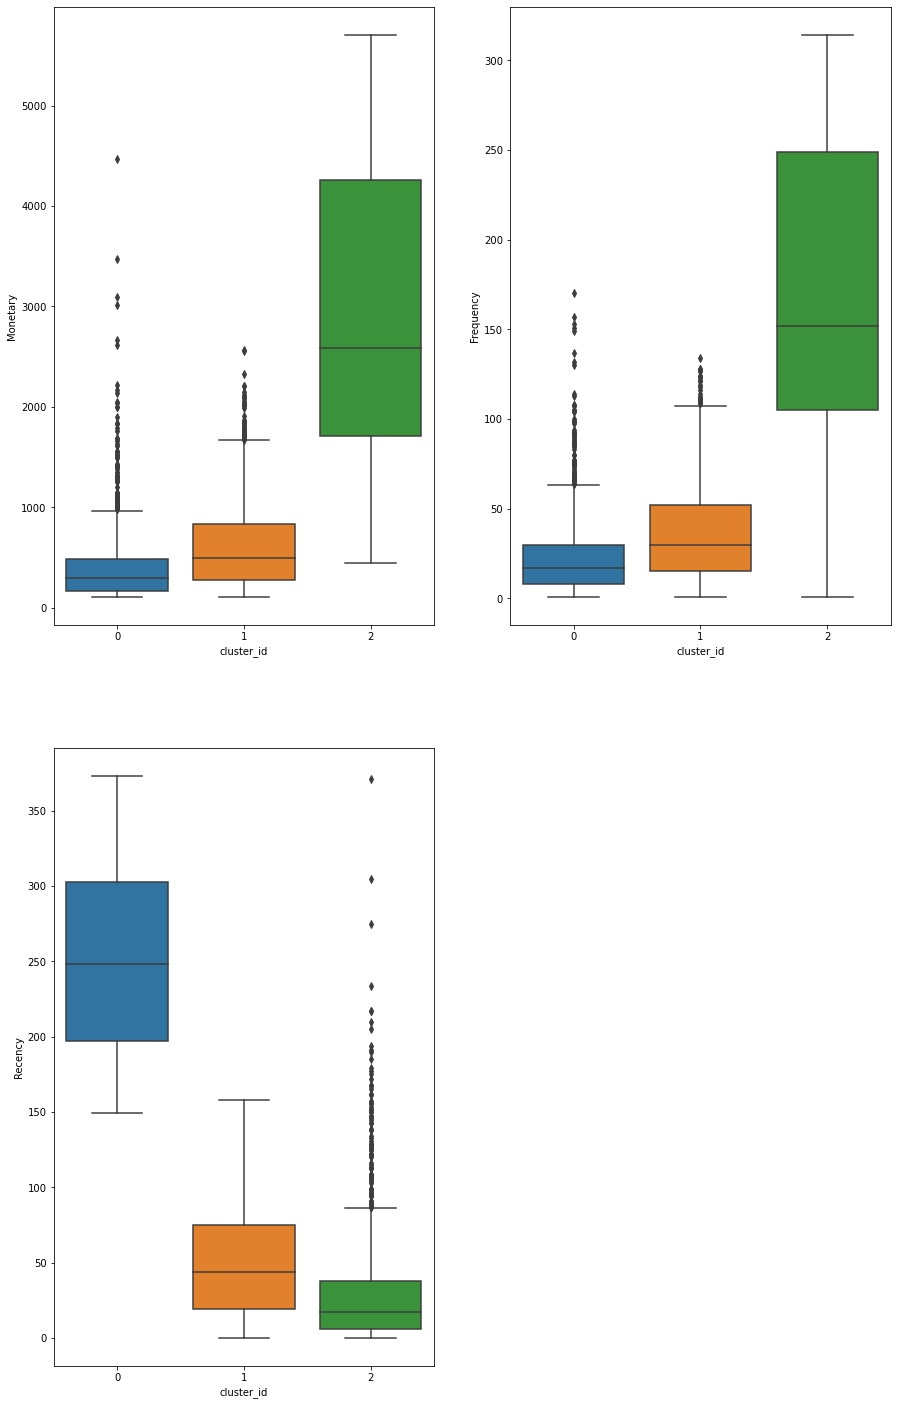

In [77]:
# Visualizing Numerical columns using Boxplots
cols = X.columns[0:-1].tolist()
r = c = 0
fig,ax = plt.subplots(2,2,figsize=(15,25))

for n,i in enumerate(cols):
    sns.boxplot(x='cluster_id',y=cols[n], data=X,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

In [102]:
# cols= X.columns[0:-1].tolist()
# _, axes = plt.subplots(len(cols), 1, figsize=(8,30))

# for ind, column in enumerate(cols):
#     sns.boxplot(x='cluster_id', y=cols[ind], data=X, ax=axes[ind]);    
 

cluster 0 --- monetary , frequency less, recency high 

cluster 1 ----monetary , frequency medium, recency medium

cluster 2 ----monetary ,  frequency high, recency less 


##### Cluster 0 shows customers who neither bring revenue nor are frequent visitors/buyers
##### Cluster 1 shows customers who are quite frequent buyers but revenue generated is not as high as customers from cluster 2

##### Cluster 2 shows customers who are frequent buyers and most of the revnue comes from them

In [79]:
X_scaled.head()

,PC_1,PC_2,cluster_id
0,-0.570503,0.407893,0
1,0.664222,0.078549,2
2,-0.010208,-0.053637,1
3,0.139841,-0.147287,2
4,-0.493482,0.399646,0


In [80]:
from sklearn.model_selection import train_test_split
X = X_scaled[['PC_1','PC_2']]
Y = X_scaled['cluster_id']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


##  Modeling - classification

### KNN classifier 

In [81]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn.score(X_train, y_train)

0.9962546816479401

In [82]:
knn.score(X_test, y_test)

0.988479262672811

In [83]:
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predict))

confussion matrix
[[196   2   0]
 [  5 387   0]
 [  0   3 275]]


Accuracy of K-NeighborsClassifier: 98.84792626728111 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       198
           1       0.99      0.99      0.99       392
           2       1.00      0.99      0.99       278

    accuracy                           0.99       868
   macro avg       0.99      0.99      0.99       868
weighted avg       0.99      0.99      0.99       868



### Naive bayes

In [84]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_predict = gnb.predict(X_test)
gnb.score(X_test, y_test)

0.956221198156682

### Support Vector machine

In [85]:
# sv = svm.SVC(kernel='linear')
# sv.fit(X_train,y_train)

from sklearn import svm
sv = svm.SVC(C=100, gamma=0.001,kernel = 'linear')
sv.fit(X_train,y_train)
svm_predict = sv.predict(X_test)
sv.score(X_test, y_test)

0.9953917050691244

In [86]:
svm_conf_matrix = confusion_matrix(y_test, svm_predict)
svm_acc_score = accuracy_score(y_test, svm_predict)
print("confussion matrix")
print(svm_conf_matrix)
print("\n")
print("Accuracy of Support Vector Machine Model:",svm_acc_score*100,'\n')
print(classification_report(y_test,svm_predict))

confussion matrix
[[197   0   1]
 [  2 390   0]
 [  0   1 277]]


Accuracy of Support Vector Machine Model: 99.53917050691244 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       198
           1       1.00      0.99      1.00       392
           2       1.00      1.00      1.00       278

    accuracy                           1.00       868
   macro avg       0.99      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



### Decision Tree

In [87]:

dt = DecisionTreeClassifier(criterion = 'entropy',random_state=42,max_depth = 6)
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)
dt.score(X_train, y_train)

0.9951022760011524

In [88]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of Support Vector Machine Model:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predict))

confussion matrix
[[194   4   0]
 [  7 378   7]
 [  0   1 277]]


Accuracy of Support Vector Machine Model: 97.81105990783409 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       198
           1       0.99      0.96      0.98       392
           2       0.98      1.00      0.99       278

    accuracy                           0.98       868
   macro avg       0.98      0.98      0.98       868
weighted avg       0.98      0.98      0.98       868




We saw that using classification models like KNeighborsClassifier,Support Vector Machine ,DecisionTree we predicted the clusters using RFM dataset as independent variables and Cluster as the target variable. The clusters predicted by the classification models perfectly aligns with K-Means clustering. So, we can conclude that our clusters are correct.



he final part of the analysis was the customer segmentation part. The main way to go around with this procces is to use the RFM (Recency, Frequency, Monetory) table to sort the customer in the groups. After creating the RFM table I used K-Means clustering (Elbow curve and Silhoutte scores) in order to create 4 clusters in which the customers should be Segmented. After each of the customers were segmented into their respective groups. I used models such as Logisitc Regression, KNeighborsClassifier ,DecisionTree in order the cross the accuracy of the clustering which resulted in an accuracy score 0.98. Hence, I conclude the customer segmentation was done which effective methods and high accuracy.